# MNIST dataset classification

In [1]:
import scipy.io as sio
import numpy as np
import random
from sklearn.svm import SVC
from sklearn.preprocessing import normalize
import matplotlib.pyplot as plt
import math
import csv

## Data partitioning

In [2]:
# Read in the file
train_mat = sio.loadmat("train.mat")
print(train_mat)

{'__header__': b'MATLAB 5.0 MAT-file Platform: posix, Created on: Fri Jan 20 17:22:08 2017', '__globals__': [], 'trainX': array([[0, 0, 0, ..., 0, 0, 5],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 4],
       ..., 
       [0, 0, 0, ..., 0, 0, 5],
       [0, 0, 0, ..., 0, 0, 6],
       [0, 0, 0, ..., 0, 0, 8]]), '__version__': '1.0'}


In [3]:
# Understand the data content
train_mat.keys()

dict_keys(['__header__', '__globals__', 'trainX', '__version__'])

In [4]:
# Get the training data
data_set = train_mat['trainX']
data_set

array([[0, 0, 0, ..., 0, 0, 5],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 4],
       ..., 
       [0, 0, 0, ..., 0, 0, 5],
       [0, 0, 0, ..., 0, 0, 6],
       [0, 0, 0, ..., 0, 0, 8]])

In [5]:
# Check the amount of data in the training set
data_set.shape

(60000, 785)

In [6]:
# Shuffle the whole provided data set
np.random.shuffle(data_set)

In [7]:
# Set aside 10000 training images as a validation set
validation_index = np.array(random.sample(range(data_set.shape[0]), 10000))
validation_set = data_set[validation_index]

In [8]:
# Verify the validation set size
validation_set.shape

(10000, 785)

In [9]:
# Construct the training set
training_data = np.delete(data_set, validation_index, 0)
print(training_data.shape)

# Separate the label and data
training_labels = training_data[:, 784]
training_data = training_data[:, 0:784]

(50000, 785)


In [10]:
# Normalize the given data
def normalize_data(data):
    result_data = np.zeros(data.shape)
    for i in range(data.shape[0]):
        result_data[i] = normalize(data[i][:,np.newaxis], axis=0).ravel()
    return result_data

## SVM

### Separate labels and data from validation_set

In [11]:
validation_labels = validation_set[:, 784]
validation_data = validation_set[:, 0:784]
print(validation_labels.shape)
print(validation_data.shape)

(10000,)
(10000, 784)


In [12]:
# Normalize the validation data
norm_validation_data = normalize_data(validation_data)

# Normalize the training data
norm_training_data = normalize_data(training_data)
    

/Users/juntan/anaconda3/envs/datascience/lib/python3.5/site-packages/sklearn/utils/validation.py:429: DataConversionWarning: Data with input dtype int64 was converted to float64 by the normalize function.
  warnings.warn(msg, _DataConversionWarning)


### Training on n examples

In [13]:
accuracy_score = []
training_accuracy_score = []
def training_classifier(n, param = 1.0, l = accuracy_score, l2 = None):
    # Get 100 training data
    training_data1 = norm_training_data[0:n]
    training_labels1 = training_labels[0:n]
    #print(training_data1.shape)
    #print(training_labels1.shape)
    # Build the SVC classifier
    classifier1 = SVC(C = param, kernel='linear')
    classifier1.fit(training_data1, training_labels1)
    # Make prediction
    score1 = classifier1.score(norm_validation_data, validation_labels)
    
    #print("accuracy score", score1)
    l.append(score1)
    if l2 != None:
        score2 = classifier1.score(training_data1, training_labels1)
        l2.append(score2)

In [19]:
training_size = [100, 200, 500, 1000, 2000, 5000, 10000]
for n in training_size:
    training_classifier(n, l = accuracy_score, l2 = training_accuracy_score)
print(accuracy_score)

[0.68030000000000002, 0.83309999999999995, 0.87070000000000003, 0.89349999999999996, 0.90869999999999995, 0.9204, 0.92979999999999996]


## Plot the accuracy score 

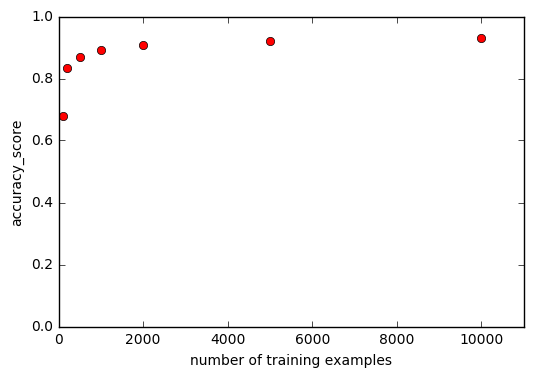

In [20]:
plt.plot(training_size, accuracy_score, "r--", label = "validation data set accuracy_score")
plt.plot(training_size, accuracy_score, "ro")
plt.plot(training_size, training_accuracy_score, "g--", label = "training data set accuracy_score")
plt.plot(training_size, training_accuracy_score, "go")
plt.ylabel("accuracy_score")
plt.xlabel("number of training examples")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.axis([0, 11000, 0, 1])
plt.show()

## Hyperparameter tuning

In [20]:
# Guess C values
Cs = list(range(300, 100, -5)) + list(range(100, 10, -5)) +\
     [math.pow(10, 1), math.pow(10, 0), math.pow(10, -1), math.pow(10, -2),
      math.pow(10, -3), math.pow(10, -4), math.pow(10, -5),math.pow(10, -6), 
      math.pow(10, -7),math.pow(10, -8),math.pow(10, -10), math.pow(10, -20),
      math.pow(10, -30)]

In [17]:
max_accuracy = 0
max_accuracy_index = 0
def tunner_with_size(n, score_list, c_s):
    for c in c_s:
        training_classifier(n, param = c, l = score_list)
    if(max(score_list) > max_accuracy):
        max_accuracy_index = scores.index(max(scores))

In [24]:
scores = []
# Start finding the best parameter with 100 training examples
tunner_with_size(100, scores, Cs)
print(scores)

[0.73519999999999996, 0.73519999999999996, 0.73519999999999996, 0.73519999999999996, 0.73519999999999996, 0.73519999999999996, 0.73519999999999996, 0.73519999999999996, 0.73519999999999996, 0.73519999999999996, 0.73519999999999996, 0.73519999999999996, 0.73519999999999996, 0.73519999999999996, 0.73519999999999996, 0.73519999999999996, 0.73519999999999996, 0.73519999999999996, 0.73519999999999996, 0.73519999999999996, 0.73519999999999996, 0.73519999999999996, 0.73519999999999996, 0.73519999999999996, 0.73519999999999996, 0.73519999999999996, 0.73519999999999996, 0.73519999999999996, 0.73519999999999996, 0.73519999999999996, 0.73519999999999996, 0.73519999999999996, 0.73519999999999996, 0.73519999999999996, 0.73519999999999996, 0.73519999999999996, 0.73519999999999996, 0.73519999999999996, 0.73519999999999996, 0.73519999999999996, 0.73519999999999996, 0.73519999999999996, 0.73519999999999996, 0.73519999999999996, 0.73519999999999996, 0.73519999999999996, 0.73519999999999996, 0.7351999999

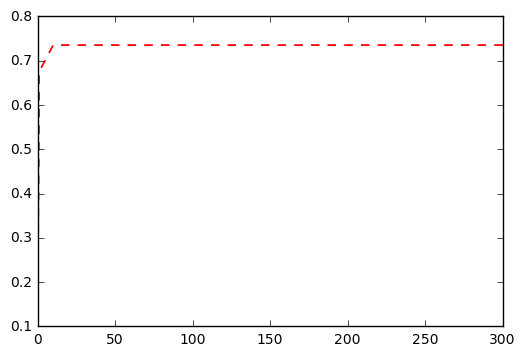

In [27]:
plt.plot(Cs, scores, "r--", label = "validation data set accuracy_score")
plt.show()

In [26]:
scores = []
# Start finding the best parameter with 200 training examples
Cs = list(range(500, 300, -5)) + Cs[:-10]
tunner_with_size(200, scores, Cs)
print(scores)

[0.84209999999999996, 0.84209999999999996, 0.84209999999999996, 0.84209999999999996, 0.84209999999999996, 0.84209999999999996, 0.84209999999999996, 0.84209999999999996, 0.84209999999999996, 0.84209999999999996, 0.84209999999999996, 0.84209999999999996, 0.84209999999999996, 0.84209999999999996, 0.84209999999999996, 0.84209999999999996, 0.84209999999999996, 0.84209999999999996, 0.84219999999999995, 0.83309999999999995, 0.1212, 0.1114, 0.1114, 0.1114, 0.1114, 0.1114, 0.1114, 0.1114, 0.1114, 0.1114, 0.1114]


In [27]:
accuracy_score500 = []
# Start finding the best parameter with 500 training examples
tunner_with_size(500, accuracy_score500, Cs)
print(accuracy_score500)
max_accuracy_with_size.append(max(accuracy_score500))

[0.87029999999999996, 0.87029999999999996, 0.87029999999999996, 0.87029999999999996, 0.87029999999999996, 0.87029999999999996, 0.87029999999999996, 0.87029999999999996, 0.87029999999999996, 0.87029999999999996, 0.87029999999999996, 0.87029999999999996, 0.87029999999999996, 0.87029999999999996, 0.87029999999999996, 0.87029999999999996, 0.87029999999999996, 0.87019999999999997, 0.86939999999999995, 0.87070000000000003, 0.60599999999999998, 0.10630000000000001, 0.10630000000000001, 0.10630000000000001, 0.10630000000000001, 0.10630000000000001, 0.10630000000000001, 0.10630000000000001, 0.10630000000000001, 0.10630000000000001, 0.10630000000000001]


In [28]:
accuracy_score1000 = []
# Start finding the best parameter with 200 training examples
tunner_with_size(1000, accuracy_score1000, Cs)
print(accuracy_score1000)
max_accuracy_with_size.append(max(accuracy_score1000))

[0.87819999999999998, 0.87819999999999998, 0.87819999999999998, 0.87819999999999998, 0.87819999999999998, 0.87819999999999998, 0.87819999999999998, 0.87819999999999998, 0.87819999999999998, 0.87819999999999998, 0.87819999999999998, 0.87819999999999998, 0.87819999999999998, 0.87819999999999998, 0.87819999999999998, 0.87819999999999998, 0.87890000000000001, 0.88170000000000004, 0.88370000000000004, 0.89349999999999996, 0.79769999999999996, 0.10630000000000001, 0.10630000000000001, 0.10630000000000001, 0.10630000000000001, 0.10630000000000001, 0.10630000000000001, 0.10630000000000001, 0.10630000000000001, 0.10630000000000001, 0.10630000000000001]


In [29]:
accuracy_score2000 = []
# Start finding the best parameter with 2000 training examples
tunner_with_size(2000, accuracy_score2000, Cs)
print(accuracy_score2000)
max_accuracy_with_size.append(max(accuracy_score2000))

[0.89529999999999998, 0.89529999999999998, 0.89529999999999998, 0.89529999999999998, 0.89529999999999998, 0.89529999999999998, 0.89529999999999998, 0.89529999999999998, 0.89529999999999998, 0.89529999999999998, 0.89529999999999998, 0.89529999999999998, 0.89529999999999998, 0.89570000000000005, 0.89570000000000005, 0.89639999999999997, 0.89729999999999999, 0.89929999999999999, 0.90200000000000002, 0.90869999999999995, 0.86180000000000001, 0.2122, 0.10630000000000001, 0.10630000000000001, 0.10630000000000001, 0.10630000000000001, 0.10630000000000001, 0.10630000000000001, 0.10630000000000001, 0.10630000000000001, 0.10630000000000001]


In [30]:
accuracy_score5000 = []
# Start finding the best parameter with 5000 training examples
tunner_with_size(5000, accuracy_score5000, Cs)
print(accuracy_score5000)
max_accuracy_with_size.append(max(accuracy_score5000))

[0.9022, 0.90229999999999999, 0.90229999999999999, 0.90249999999999997, 0.90269999999999995, 0.90300000000000002, 0.90329999999999999, 0.90359999999999996, 0.90439999999999998, 0.90439999999999998, 0.90459999999999996, 0.90590000000000004, 0.90629999999999999, 0.90700000000000003, 0.90969999999999995, 0.91190000000000004, 0.91449999999999998, 0.91549999999999998, 0.91869999999999996, 0.9204, 0.89539999999999997, 0.62309999999999999, 0.1114, 0.1114, 0.1114, 0.1114, 0.1114, 0.1114, 0.1114, 0.1114, 0.1114]


In [31]:
accuracy_score10000 = []
# Start finding the best parameter with 10000 training examples
tunner_with_size(10000, accuracy_score10000, Cs)
print(accuracy_score10000)
max_accuracy_with_size.append(max(accuracy_score10000))

[0.91390000000000005, 0.91390000000000005, 0.91359999999999997, 0.91420000000000001, 0.91490000000000005, 0.91590000000000005, 0.91649999999999998, 0.91669999999999996, 0.91690000000000005, 0.91779999999999995, 0.91879999999999995, 0.91910000000000003, 0.91990000000000005, 0.92159999999999997, 0.92320000000000002, 0.92490000000000006, 0.9264, 0.92789999999999995, 0.93069999999999997, 0.92979999999999996, 0.90780000000000005, 0.81630000000000003, 0.1114, 0.1114, 0.1114, 0.1114, 0.1114, 0.1114, 0.1114, 0.1114, 0.1114]


In [ ]:
# Tunning the hyperparameter with different training size
sizes = [100,200,500,1000,2000,5000,10000]
max_accuracy = 0
max_accuracy_index = 0
for size in sizes:
    scores = []
    tunner_with_size(size, scores, Cs)
    print(size + ":" + scores)
    if(max(scores) > max_accuracy):
        max_accuracy_index = scores.index(max(scores))

## Kaggle Prediction

In [32]:
best_c = Cs[max_accuracy_index]
best_c


6


10.0

In [33]:
# Read in the test file
test_mat = sio.loadmat("test.mat")
print(test_mat)
print(test_mat.keys())

{'__globals__': [], 'testX': array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ..., 
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]]), '__header__': b'MATLAB 5.0 MAT-file Platform: posix, Created on: Fri Jan 20 17:22:25 2017', '__version__': '1.0'}
dict_keys(['__globals__', 'testX', '__header__', '__version__'])


In [ ]:
# Make predictions
best_clf = SVC(C = best_c, kernel='linear')

test_data = test_mat['testX']

# Normalize the test data
norm_test_data = normalize_data(test_data)

best_clf.fit(training_data, training_labels)
predictions = best_clf.predict(test_data)

/Users/juntan/anaconda3/envs/datascience/lib/python3.5/site-packages/sklearn/utils/validation.py:429: DataConversionWarning: Data with input dtype int64 was converted to float64 by the normalize function.
  warnings.warn(msg, _DataConversionWarning)


In [35]:
i = 0
with open('mnist_submission.csv', 'w', newline='') as outfile:
    writer = csv.writer(outfile)
    writer.writerow(['Id'] + ['Category'])
    for num in predictions:
        writer.writerow([i] + [num])
        i += 1